In [2]:
import numpy
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

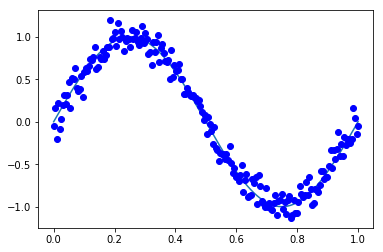

In [3]:
N = 200 
x = list(float(i-1)/(N-1) for i in range(1, N+1))
y = list(math.sin(2*math.pi*x[i]) for i in range(len(x)))
gwn = numpy.random.normal(0, 0.1, size=N)
for i in range(N):
    y[i] += gwn[i]

D = list((x[i], y[i]) for i in range(N))
sinusoidal_y = list(math.sin(2*math.pi*x[i]) for i in range(len(x)))

plt.plot(x, sinusoidal_y)
plt.plot(x, y, 'bo')

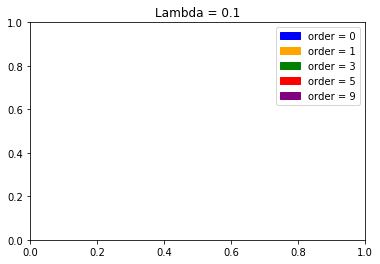

In [32]:
# d: order of polynomial fitting
for regularization in [0, 1.0/10000, 1.0/1000, 1.0/100, 1.0/10]:
    handle = []
    colors = ['blue', 'orange', 'green', 'red', 'purple']
    for i,d in enumerate([0, 1, 3, 5, 9]): 
        I = numpy.identity(d+1)
        I[0][0] = 0 
        lambda_reg = regularization
        to_plot = []

        for size in [10, 50, 100, 150, 200]:
            X = [[x[i]**j for j in range(d+1)] for i in range(size)]
            Xt = numpy.matrix.transpose(numpy.array(X))
            # x^t * x + regularization
            W = numpy.matmul(Xt, X)
            W += lambda_reg*I
            # (x^t * x)^-1
            W = numpy.linalg.inv(W)
            # x^t * y
            XtY = numpy.matmul(Xt, y[:size])
            # final coefficient vector W
            Wfinal = numpy.matmul(W, XtY)

            Wt = numpy.matrix.transpose(Wfinal)
            pred = numpy.matmul(Wt, Xt)
            MSE = float(sum((pred[i]-y[i])**2 \
                                     for i in range(len(pred))))/size
            to_plot.append(MSE)

        handle.append(mpl.patches.Patch(color=colors[i], label="order = "+str(d)))
        
        plt.plot([10, 50, 100, 150, 200], to_plot)
        #print("Coefficient vector for d = %i:" % d)
        #print(Wfinal)
        #print("Prediction vector for d = %i:" %d)
        #print(pred)
        #print("Mean squared error for d = %i:" %d)
        #print(float(sum((pred[i]-y[i])**2 for i in range(len(pred))))/N)
    plt.legend(handles=handle)
    plt.title('Lambda = ' + str(regularization))
    plt.show()

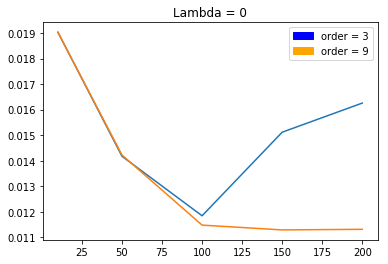

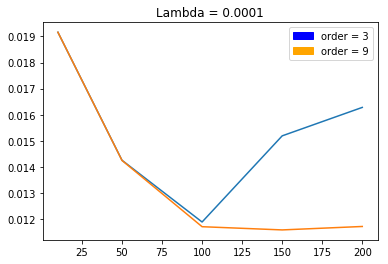

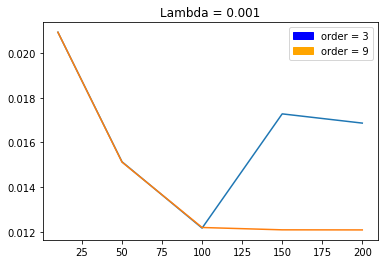

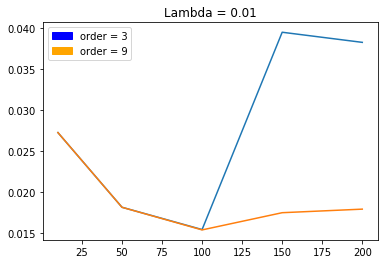

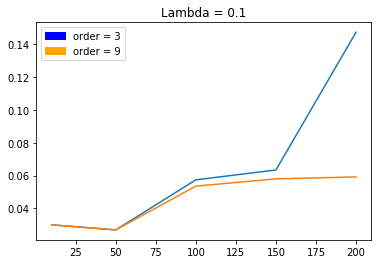

In [38]:
Ntest = 199
xtest = [x[i]+(1.0/(2*(Ntest))) for i in range(0, Ntest+1)]
ytest = [math.sin(2*math.pi*t) for t in xtest]

for regularization in [0, 1.0/10000, 1.0/1000, 1.0/100, 1.0/10]:
    handle = []
    colors = ['blue', 'orange']
    for i,d in enumerate([3, 9]): 
        I = numpy.identity(d+1)
        I[0][0] = 0 
        lambda_reg = regularization
        to_plot = []

        for size in [10, 50, 100, 150, 200]:
            X = [[xtest[i]**j for j in range(d+1)] for i in range(size)]
            Xt = numpy.matrix.transpose(numpy.array(X))
            # x^t * x + regularization
            W = numpy.matmul(Xt, X)
            W += lambda_reg*I
            # (x^t * x)^-1
            W = numpy.linalg.inv(W)
            # x^t * y
            XtY = numpy.matmul(Xt, ytest[:size])
            # final coefficient vector W
            Wfinal = numpy.matmul(W, XtY)

            Wt = numpy.matrix.transpose(Wfinal)
            pred = numpy.matmul(Wt, Xt)
            MSE = float(sum((pred[i]-y[i])**2 \
                                     for i in range(len(pred))))/size
            to_plot.append(MSE)

        handle.append(mpl.patches.Patch(color=colors[i], label="order = "+str(d)))
        
        plt.plot([10, 50, 100, 150, 200], to_plot)
        #print("Coefficient vector for d = %i:" % d)
        #print(Wfinal)
        #print("Prediction vector for d = %i:" %d)
        #print(pred)
        #print("Mean squared error for d = %i:" %d)
        #print(float(sum((pred[i]-y[i])**2 for i in range(len(pred))))/N)
    plt.legend(handles=handle)
    plt.title('Lambda = ' + str(regularization))
    plt.show()